#### 2D heatmap

In [6]:
require 'pilot-gnuplot'
include Gnuplot
include Math

init = (-PI..PI).step(0.05).to_a
x = init.map { |el| [el] * init.size }.flatten
y = init * init.size
z = x.map.with_index { |xx, index| cos(0.5*xx*xx + y[index]**2) }
nil

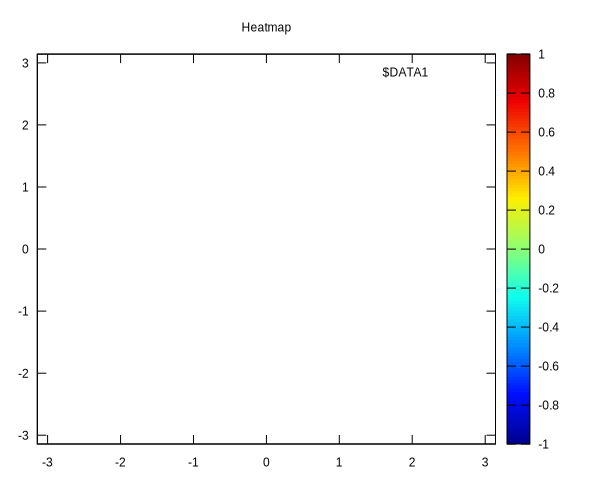

In [2]:
heatmap = Plot.new(
  [[x,y,z], with: 'image'],
  title: "Heatmap",
  style: 'data lines',
  palette: 'defined ( 0 "#000090",\
                      1 "#000fff",\
                      2 "#0090ff",\
                      3 "#0fffee",\
                      4 "#90ff70",\
                      5 "#ffee00",\
                      6 "#ff7000",\
                      7 "#ee0000",\
                      8 "#7f0000")',
  view: 'map',
  xrange: -PI..PI,
  yrange: -PI..PI
)

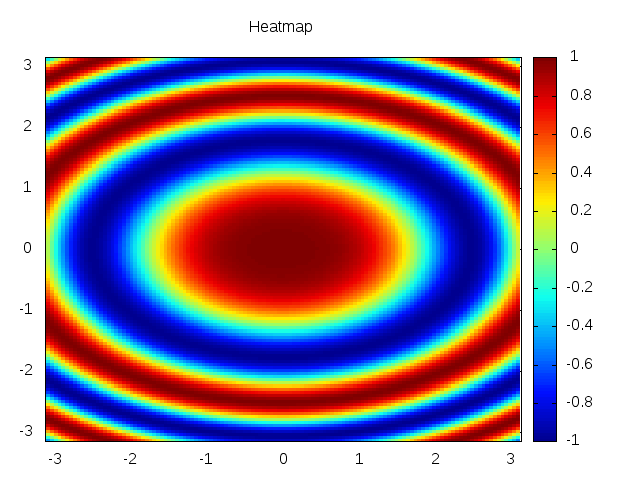

In [3]:
# github doesn't show plot above so I added this png
heatmap.to_png('heatmap.png')
File.open('heatmap.png')

#### 3D heatmap

3D heatmap data should be prepared not the same way as simple 3D plot's. In this case data should consist of chunks:
```
x1 y1 z11 c11
x1 y2 z12 c12
x1 y3 z13 c13
...
x1 yN z1N c1N
                 #blank line here
x2 y1 z21 c21
x2 y2 z22 c22
...
x2 yN z2N c2N
                 #blank line here
.
.
.
                 #blank line here
xN y1 zN1 cN1
xN y2 zN2 cN2
...
xN yN zNN cNN
```

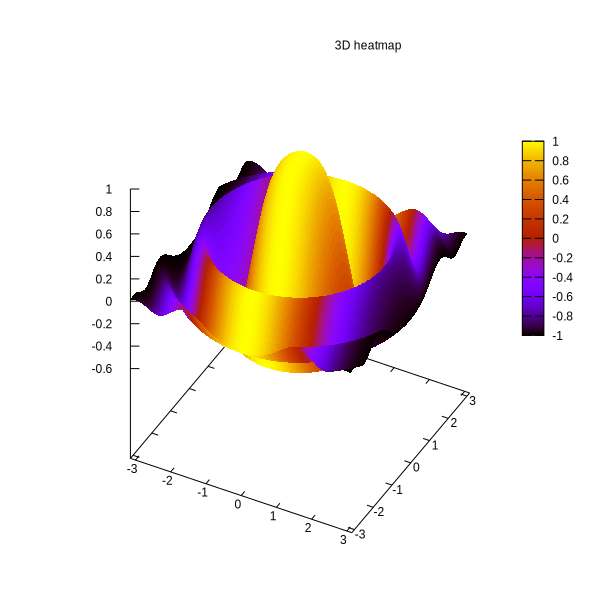

In [4]:
def z_function(x, y)
  arg = x ** 2 + y ** 2
  cos(arg) * exp(-arg/5.0)
end

x = init.map { |el| [el] * init.size << ' ' }.flatten
y = (init + [' ']) * init.size
z = x.map.with_index { |xx, index| xx.is_a?(String) ? ' ' : z_function(xx, y[index]) }
color = x.map { |xx| xx.is_a?(String) ? ' ' : cos(xx) }

plot3d = Splot.new(
    [[x,y,z, color], title: '3D heatmap', using: '1:2:3:4', with: 'pm3d'],
    xrange: -PI..PI,
    yrange: -PI..PI,
    view: [49, 28, 0.8, 1.48],
    term: ['svg', size: [600,600]]
)

#### 2D heatmap (matrix example)

In [8]:
matrix = <<EOD
6 5 4 3 1 0
3 2 2 0 0 1
0 0 0 0 1 0
0 0 0 0 2 3
0 0 1 2 4 3
0 1 2 3 4 5
EOD
File.write('heat_map_data.txt', matrix)

72

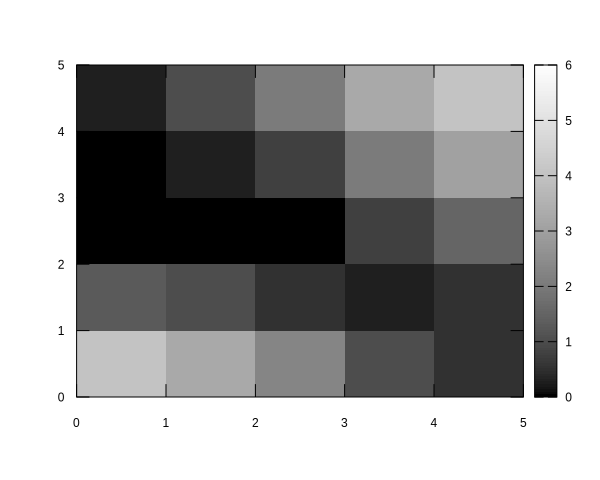

In [12]:
Splot.new(
  ['heat_map_data.txt', matrix: true],
  pm3d: 'map',
  palette: 'grey'
)